In [1]:
import pandas as pd
import numpy as np
import sklearn 
import copy as cp

In [2]:
#2.1 以 DataFrame 格式載入 train.csv (5%) 

df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#2.2 請檢查並列出 train.csv 中每個欄位的空值個數 (5%) 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
male = cp.deepcopy(df[df['Sex'].isin(['male'])])
male.groupby(['Sex']).size()

Sex
male    577
dtype: int64

In [6]:
#男性的年齡平均值為30.7(四捨五入到第一位)
means=male.mean()
means['Age'].round(1)

30.7

In [7]:
male['Age'] = male['Age'].fillna(means['Age'].round(1))

In [8]:
female = cp.deepcopy(df[~df['Sex'].isin(['male'])])
female.groupby(['Sex']).size()

Sex
female    314
dtype: int64

In [9]:
#女性的年齡平均值為27.9(四捨五入到第一位)
means2 = female.mean()
means2['Age'].round(1)

27.9

In [10]:
female['Age'] = female['Age'].fillna(means2['Age'].round(1))

In [11]:
#2.3 將 Age 欄位空值以該性別平均值填入。(10%) 

df2 = pd.concat([male,female],join='inner')
df2 = df2.sort_index(axis = 0)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.9,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
#2.4 將 Cabin 欄位重製為 Pclass * Fare (5%)

df2['Cabin'] = df2[['Pclass','Fare']].product(axis=1)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,21.7500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,23.7750,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,24.1500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.9,1,2,W./C. 6607,23.4500,70.3500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,30.0000,C


In [13]:
#2.5 將 Survived 欄位重製為 0=Alive 1=Dead (5%)

df2.loc[df2.Survived==0,'Survived']='Alive'
df2.loc[df2.Survived==1,'Survived']='Dead'
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Alive,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,21.7500,S
1,2,Dead,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,71.2833,C
2,3,Dead,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,23.7750,S
3,4,Dead,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,53.1000,S
4,5,Alive,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,24.1500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Alive,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,26.0000,S
887,888,Dead,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,30.0000,S
888,889,Alive,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.9,1,2,W./C. 6607,23.4500,70.3500,S
889,890,Dead,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,30.0000,C


In [14]:
#2.6 將 Sex 與 Embarked 欄位轉為數字型態（例如：男性=0，女性=1）(5%)
#寫完才發現有Label Encoder, One Hot Encoder這種東西，但就不改了

df2.loc[df2.Sex=='male','Sex']=0
df2.loc[df2.Sex=='female','Sex']=1

df2.loc[df2.Embarked=='C','Embarked']=0
df2.loc[df2.Embarked=='Q','Embarked']=1
df2.loc[df2.Embarked=='S','Embarked']=2

df2['Sex'] = df2['Sex'].astype(np.float64)
df2['Embarked'] = df2['Embarked'].astype(np.float64)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     889 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 90.5+ KB


In [15]:
#後來發現Embarked中還有兩個空值，先用0填起來
df2['Embarked'] = df2['Embarked'].fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 90.5+ KB


In [32]:
#將整理好的pd2匯出成csv

df2.to_csv("ECT_HW3_107403023.csv")


In [16]:
import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [17]:
#請以 PassengerId、Survived、Name、Ticket、Pclass 以外的欄位作為訓練資料，建立 Decision tree 來預測 Survived

X = df2.drop(['PassengerId','Survived','Pclass','Name','Ticket'], axis =1).values
y = df2['Survived'].values

In [18]:
print(X.shape)
print(y.shape)

(891, 7)
(891,)


In [19]:
#將訓練資料比例設為 50%，random_state 設為 12，stratify = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=12)


In [20]:
#製作DecisionTreeClassifier，default就是gini index的方法，另外三個參數是避免model over-fitting
#再把分出來的訓練資料丟進tree

clf = tree.DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=12)

tree_result = clf.fit(X_train,y_train)
tree_result

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=12)

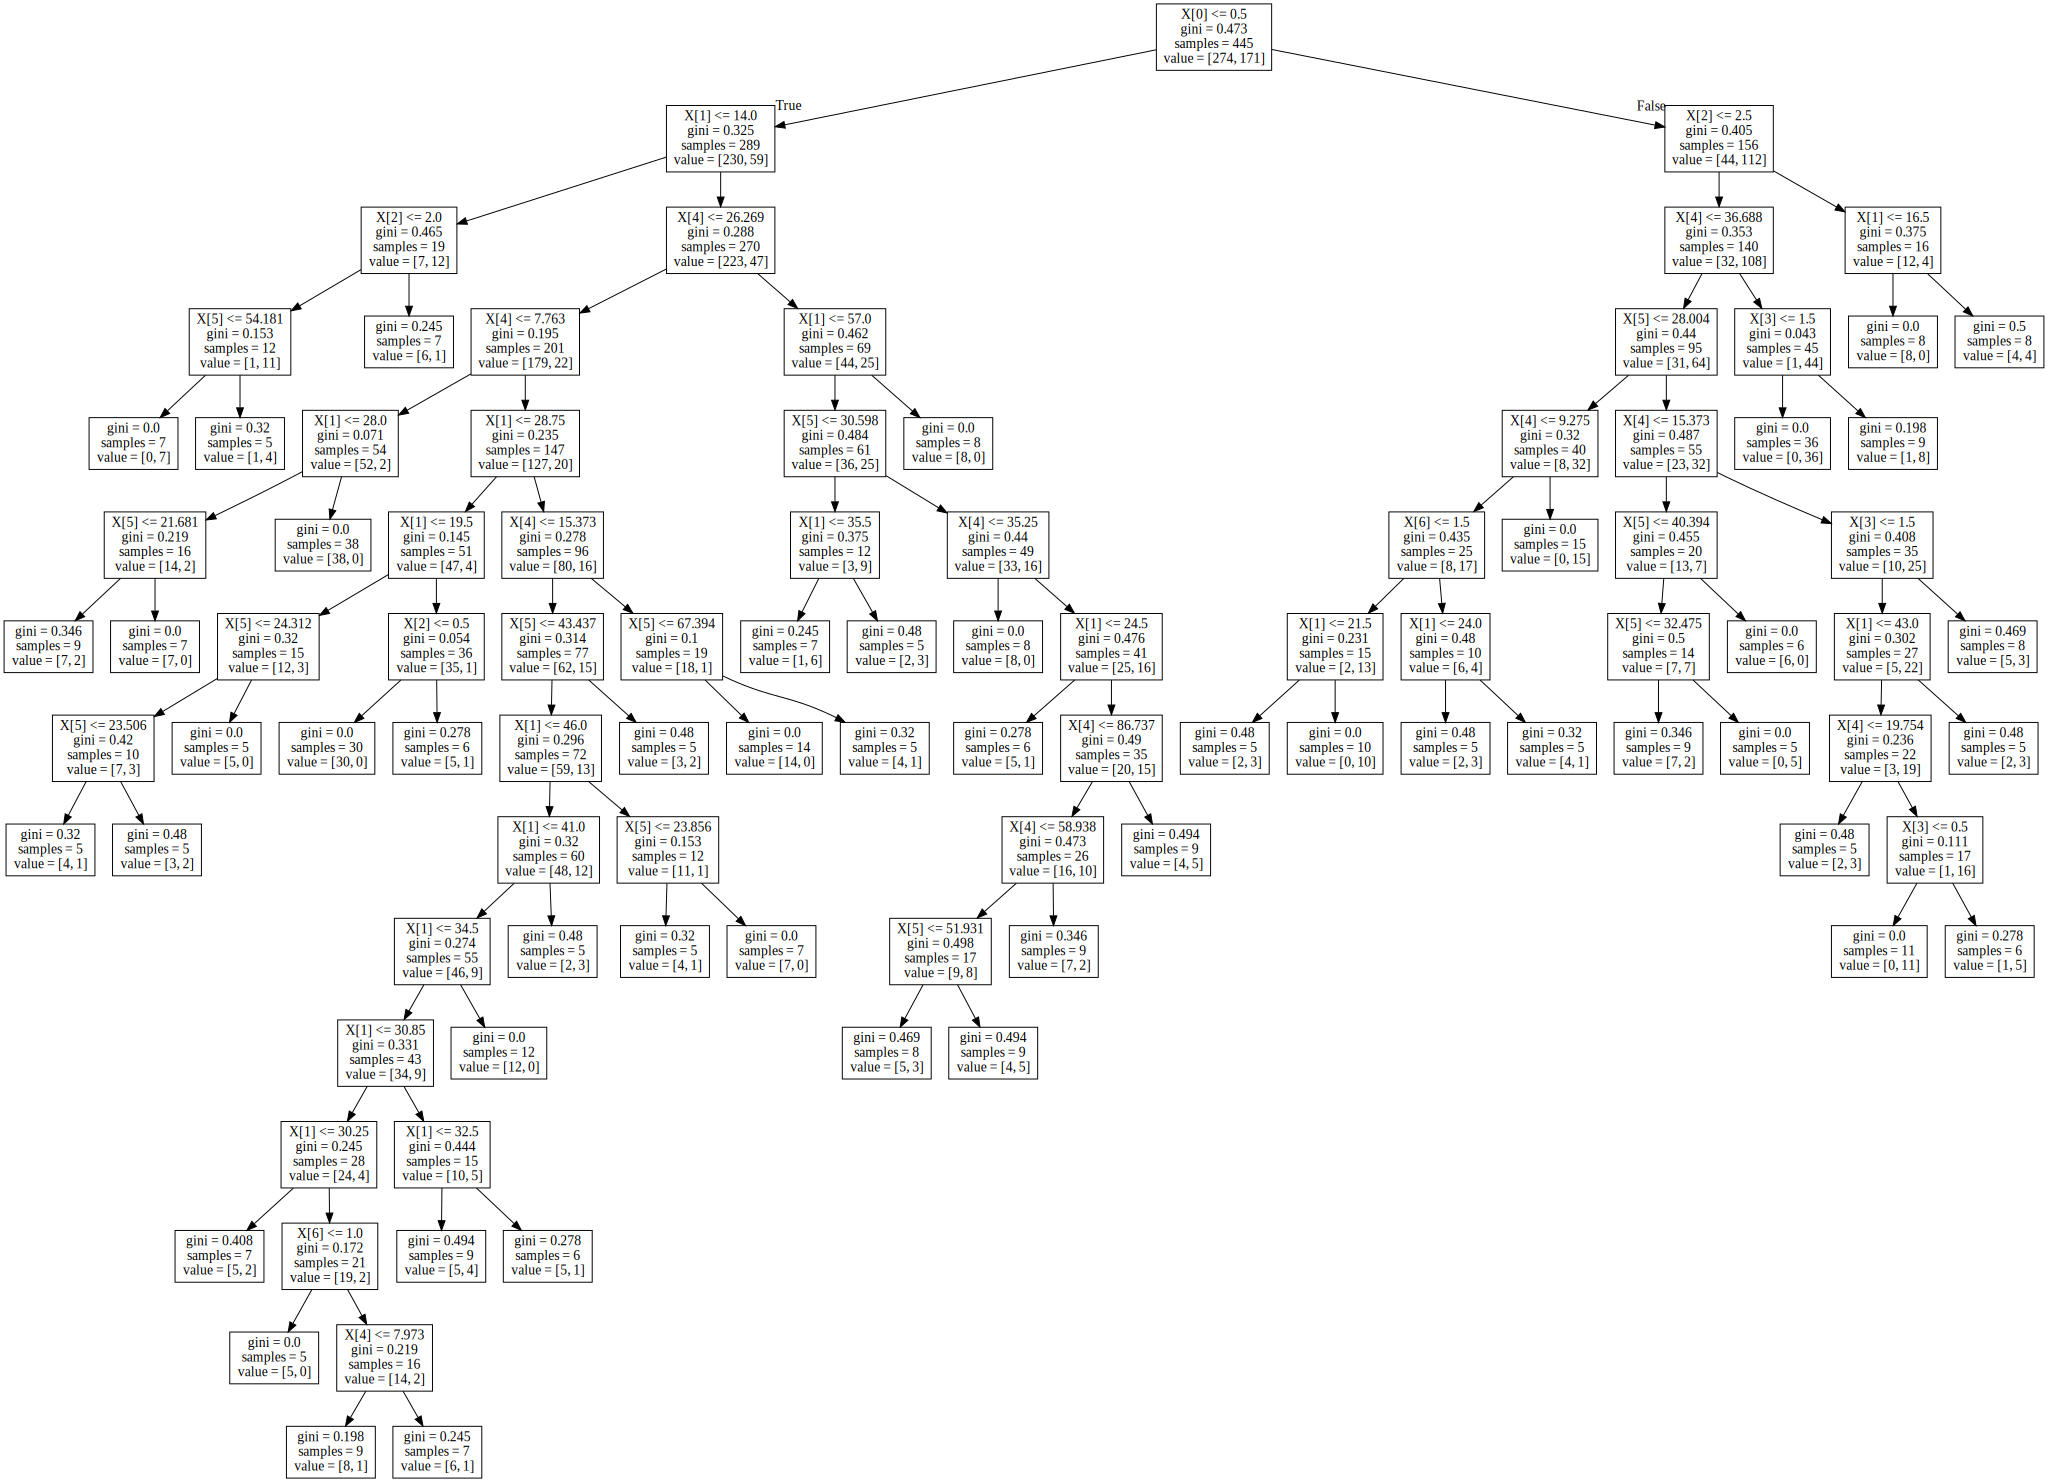

In [21]:
#繪出 Decision tree 的樹狀圖 

graph_data = tree.export_graphviz(tree_result)
graph = graphviz.Source(graph_data)
graph

In [22]:
#計算出在2.7測試資料上的平均準確率(5%)
#把分出來的X_test的資料丟進tree.predict，算這次資料的正確率

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))


DecisionTreeClassifier accuracy score: 0.8161434977578476


In [23]:
accuracy_50 = accuracy
accuracy_50

0.8161434977578476

In [24]:
#請用2.7的結果評估決策樹好壞(使用classification_report)產生類似以下結果(5%)

target_names = ['Alive', 'Dead']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Alive       0.85      0.85      0.85       275
        Dead       0.76      0.75      0.76       171

    accuracy                           0.82       446
   macro avg       0.81      0.80      0.81       446
weighted avg       0.82      0.82      0.82       446



In [25]:
#60%訓練比例

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, stratify=y, random_state=12)
tree_result = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_60 = accuracy_score(y_test, y_pred)
accuracy_60

0.7514018691588785

In [26]:
#70%訓練比例

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, stratify=y, random_state=12)
tree_result = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_70 = accuracy_score(y_test, y_pred)
accuracy_70

0.780448717948718

In [27]:
#80%訓練比例

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y, random_state=12)
tree_result = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_80 = accuracy_score(y_test, y_pred)
accuracy_80

0.7573632538569425

In [28]:
#90%訓練比例

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify=y, random_state=12)
tree_result = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_90 = accuracy_score(y_test, y_pred)
accuracy_90

0.7144638403990025

In [29]:
data = {
    "split_proportion": ["50/50", "60/40", "70/30", "80/20", "90/10"],
    "score": [accuracy_50, accuracy_60, accuracy_70, accuracy_80, accuracy_90]
}

df4 = pd.DataFrame(data)    
df4

,split_proportion,score
0,50/50,0.816143
1,60/40,0.751402
2,70/30,0.780449
3,80/20,0.757363
4,90/10,0.714464


In [30]:
import matplotlib.pyplot as plt

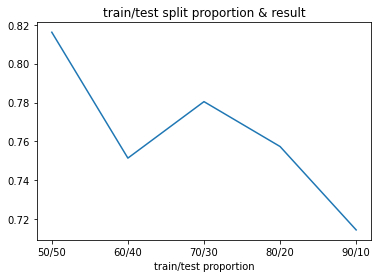

In [31]:
#呈上題，將此比較結果以折線圖呈現，如下圖所示：(5%)

plt.title("train/test split proportion & result") # title
plt.xlabel("train/test proportion") # x label
plt.plot(df4['split_proportion'],df4['score'])